In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import bokeh as beh
import os
import sys

In [5]:
df = pd.read_csv('Netflix Dataset.csv', index_col=[0])
print(df.info())
null = df.isnull().sum()
null

<class 'pandas.core.frame.DataFrame'>
Index: 7789 entries, s1 to s7787
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Category      7789 non-null   object
 1   Title         7789 non-null   object
 2   Director      5401 non-null   object
 3   Cast          7071 non-null   object
 4   Country       7282 non-null   object
 5   Release_Date  7779 non-null   object
 6   Rating        7782 non-null   object
 7   Duration      7789 non-null   object
 8   Type          7789 non-null   object
 9   Description   7789 non-null   object
dtypes: object(10)
memory usage: 669.4+ KB
None


Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

In [60]:
print(df.size)
print(df.shape)

77890
(7789, 10)


In [64]:
df.dtypes

Category        object
Title           object
Director        object
Cast            object
Country         object
Release_Date    object
Rating          object
Duration        object
Type            object
Description     object
dtype: object

In [65]:
df.head()

,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
Show_Id,,,,,,,,,,
s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [66]:
df['Title'].is_unique

False

In [6]:
df[df.duplicated()]

,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
Show_Id,,,,,,,,,,
s684,Movie,Backfire,Dave Patten,"Black Deniro, Byron ""Squally"" Vinson, Dominic ...",United States,"April 5, 2019",TV-MA,97 min,"Dramas, Independent Movies, Thrillers",When two would-be robbers accidentally kill a ...
s6621,Movie,The Lost Okoroshi,Abba T. Makama,"Seun Ajayi, Judith Audu, Tope Tedela, Ifu Enna...",Nigeria,"September 4, 2020",TV-MA,94 min,"Comedies, Dramas, Independent Movies",A disillusioned security guard transforms into...


In [7]:
df.drop_duplicates(inplace=True)

In [ ]:
reader = open("Example.csv", "r") #alternate for duplicate values
lines = reader.read().split("\n")
reader.close()
 
writer = open("Example_new.csv", "w")
for line in set(lines):
    writer.write(line + "\n")
writer.close()

In [72]:
df.shape

(7787, 10)

In [73]:
df.isnull().sum()

Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

<AxesSubplot:ylabel='Show_Id'>

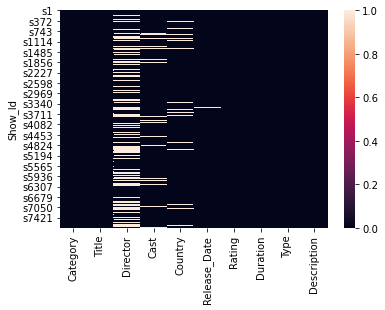

In [4]:
sns.heatmap(df.isnull())

In [8]:
df.dropna(axis=0, inplace=True)

In [77]:
df.shape

(4809, 10)

<AxesSubplot:ylabel='Show_Id'>

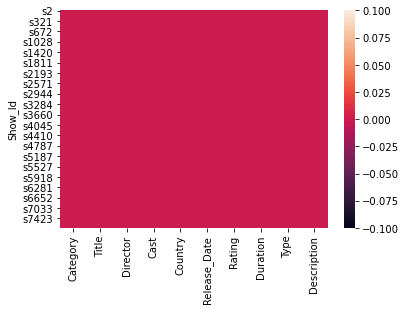

In [78]:
sns.heatmap(df.isnull())

In [79]:
#https://youtu.be/b7Kd0fLwgO4

In [6]:
df['Time']=pd.to_datetime(df['Release_Date'])

In [81]:
df.head()

,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Time
Show_Id,,,,,,,,,,,
s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23
s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018-12-20
s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017-11-16
s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020-01-01
s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017-07-01


In [84]:
df.dtypes

Category                object
Title                   object
Director                object
Cast                    object
Country                 object
Release_Date            object
Rating                  object
Duration                object
Type                    object
Description             object
Time            datetime64[ns]
dtype: object

In [85]:
df['Time'].dt.year.value_counts()

2019    1337
2020    1229
2018    1115
2017     752
2016     207
2021      78
2015      50
2014      14
2011      13
2013       7
2012       3
2009       2
2008       1
2010       1
Name: Time, dtype: int64

<AxesSubplot:>

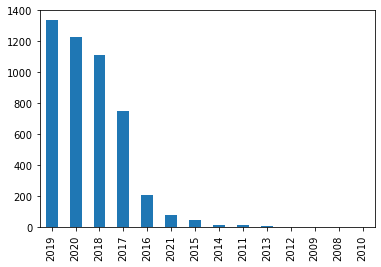

In [94]:
df['Time'].dt.year.value_counts().plot(kind='bar')

<AxesSubplot:ylabel='Time'>

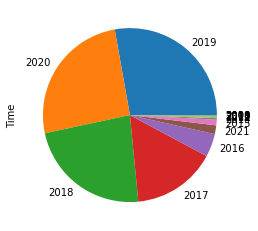

In [95]:
df['Time'].dt.year.value_counts().plot(kind='pie')

In [96]:
df.groupby('Category').Category.count()

Category
Movie      4673
TV Show     136
Name: Category, dtype: int64

C:\Users\SantoshKumar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Category', ylabel='count'>

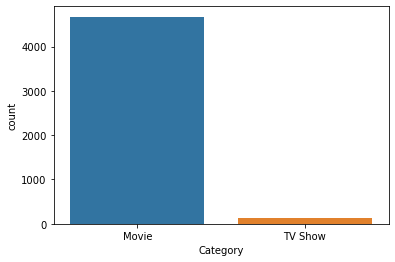

In [99]:
sns.countplot(df['Category'])

(array([358., 349., 156., 217.,  56.,  28.,  55.,  26.,  61.]),
 array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100]),
 <BarContainer object of 9 artists>)

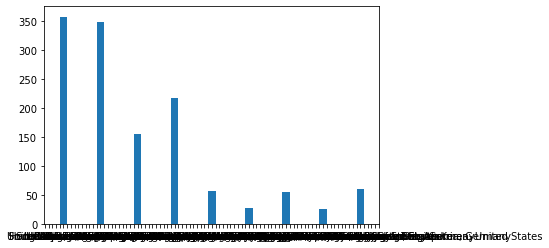

In [11]:
df3 =df.Country
bin = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
plt.hist(df3, bin, histtype='bar', rwidth = 0.2)